In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler

# Biblioteca para fazer a NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler

# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca para calcular a acuracia do modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from kseg_py import *

from imblearn.over_sampling import ADASYN

from scipy.stats import tukey_hsd
from scipy import stats

In [162]:
KNN_rep = pd.read_csv("Resultados/KNN_10V_rep.csv", na_values='?')
KNN_adasyn = pd.read_csv("Resultados/KNN_10V_adasyn.csv", na_values='?')
KNN_contr = pd.read_csv("Resultados/KNN_10V_contr.csv", na_values='?')

Kseg_contr_neg = pd.read_csv("Resultados/Kseg_10V_contr_neg.csv", na_values='?')

RNA_rep = pd.read_csv("Resultados/RNA_10V_rep.csv", na_values='?')
RNA_adasyn = pd.read_csv("Resultados/RNA_10V_adasyn.csv", na_values='?')
RNA_contr = pd.read_csv("Resultados/RNA_10V_contr.csv", na_values='?')

SVM_contr_neg = pd.read_csv("Resultados/SVM_10V_contr_neg.csv", na_values='?')

In [163]:
RNA_adasyn['abor'] = "RNA+ADASYN"
RNA_rep['abor'] = "RNA+REP"
RNA_contr['abor'] = "RNA_BASE"

KNN_adasyn['abor'] = "k_NN+ADASYN"
KNN_rep['abor'] = "k_NN+REP"
KNN_contr['abor'] = "k_NN_BASE"

SVM_contr_neg['abor'] = "OC_SVM"

Kseg_contr_neg['abor'] = "OC_PC"

df = pd.DataFrame(np.concatenate([RNA_adasyn.values, 
                                  RNA_rep.values,
                                  RNA_contr.values,
                                  KNN_adasyn.values,
                                  KNN_rep.values,
                                  KNN_contr.values,
                                  SVM_contr_neg.values,
                                  Kseg_contr_neg.values]), columns=RNA_adasyn.columns)

df.to_csv("Resultados/Todas_Abordagens.csv", encoding = 'utf-8', index = False)

### **ACCURACY**

In [133]:
RNA_contr.describe()

,tn,fp,fn,tp,sensitivity,specificity,precision,f1score,f2score,gmean_mba,gmean
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,992.120000,1050.880000,10.440000,11.560000,0.525455,0.485619,0.012018,0.023349,0.053878,0.227106,0.469093
std,440.414641,440.414641,3.822633,3.822633,0.173756,0.215573,0.004580,0.008578,0.018034,0.082591,0.084434
min,267.000000,281.000000,2.000000,3.000000,0.136364,0.130690,0.005501,0.010741,0.024233,0.101121,0.317996
25%,636.250000,620.000000,7.750000,9.000000,0.409091,0.311429,0.008907,0.017470,0.041712,0.164197,0.405211
50%,891.500000,1151.500000,10.000000,12.000000,0.545455,0.436368,0.010674,0.021013,0.049414,0.219753,0.468774
75%,1423.000000,1406.750000,13.000000,14.250000,0.647727,0.696525,0.013773,0.026850,0.061729,0.272549,0.522062
max,1762.000000,1776.000000,19.000000,20.000000,0.909091,0.862457,0.030488,0.057143,0.120192,0.526632,0.725694


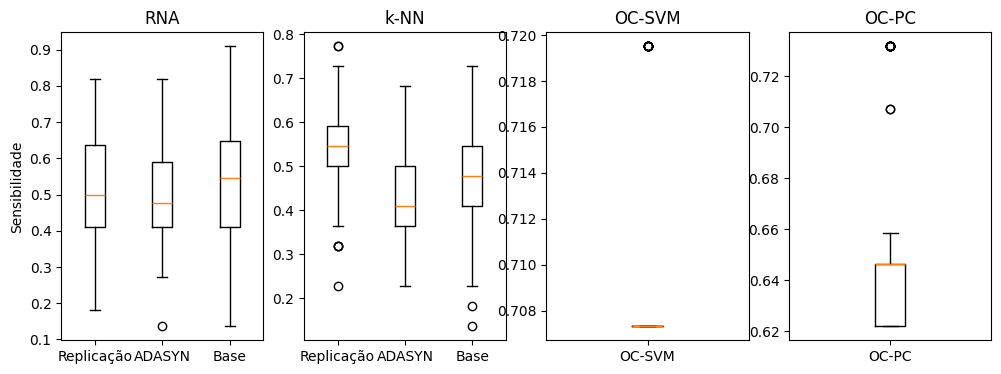

In [134]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

axs[0].boxplot([RNA_rep.sensitivity, RNA_adasyn.sensitivity, RNA_contr.sensitivity])
axs[0].set_xticklabels(["Replicação", "ADASYN", "Base"])
axs[0].set_ylabel("Sensibilidade")
axs[0].set_title('RNA')

axs[1].boxplot([KNN_rep.sensitivity, KNN_adasyn.sensitivity, KNN_contr.sensitivity])
axs[1].set_xticklabels(["Replicação", "ADASYN", "Base"])
axs[1].set_title('k-NN')

axs[2].boxplot([SVM_contr_neg.sensitivity])
axs[2].set_xticklabels(['OC-SVM'])
axs[2].set_title('OC-SVM')

axs[3].boxplot([Kseg_contr_neg.sensitivity])
axs[3].set_xticklabels(["OC-PC"])
axs[3].set_title('OC-PC')

plt.show()

### **Sensibilidade**

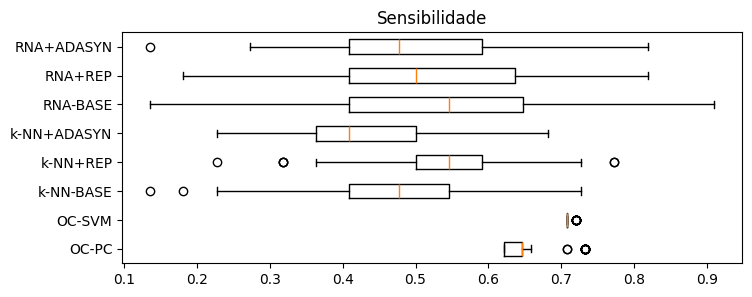

In [135]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 3))

axs.boxplot([Kseg_contr_neg.sensitivity, 
            SVM_contr_neg.sensitivity, 
            KNN_contr.sensitivity, 
            KNN_rep.sensitivity, 
            KNN_adasyn.sensitivity, 
            RNA_contr.sensitivity, 
            RNA_rep.sensitivity, 
            RNA_adasyn.sensitivity], vert=False)

axs.set_yticklabels(["OC-PC", "OC-SVM", "k-NN-BASE", "k-NN+REP", "k-NN+ADASYN", "RNA-BASE", "RNA+REP", "RNA+ADASYN"])
axs.set_title('Sensibilidade')

plt.show()

### **Especificidade**

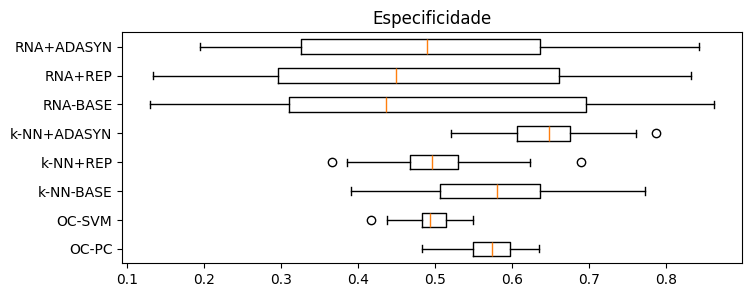

In [136]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 3))

axs.boxplot([Kseg_contr_neg.specificity, 
            SVM_contr_neg.specificity, 
            KNN_contr.specificity, 
            KNN_rep.specificity, 
            KNN_adasyn.specificity, 
            RNA_contr.specificity, 
            RNA_rep.specificity, 
            RNA_adasyn.specificity], vert=False)

axs.set_yticklabels(["OC-PC", "OC-SVM", "k-NN-BASE", "k-NN+REP", "k-NN+ADASYN", "RNA-BASE", "RNA+REP", "RNA+ADASYN"])
axs.set_title('Especificidade')

plt.show()

### **Precisão**

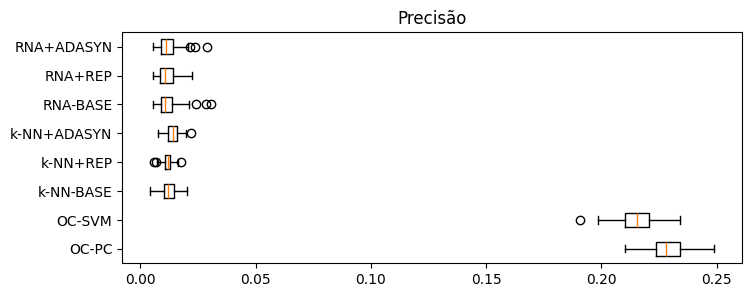

In [137]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 3))

axs.boxplot([Kseg_contr_neg.precision, 
            SVM_contr_neg.precision, 
            KNN_contr.precision, 
            KNN_rep.precision, 
            KNN_adasyn.precision, 
            RNA_contr.precision, 
            RNA_rep.precision, 
            RNA_adasyn.precision], vert=False)

axs.set_yticklabels(["OC-PC", "OC-SVM", "k-NN-BASE", "k-NN+REP", "k-NN+ADASYN", "RNA-BASE", "RNA+REP", "RNA+ADASYN"])
axs.set_title('Precisão')

plt.show()

### **F-measure**

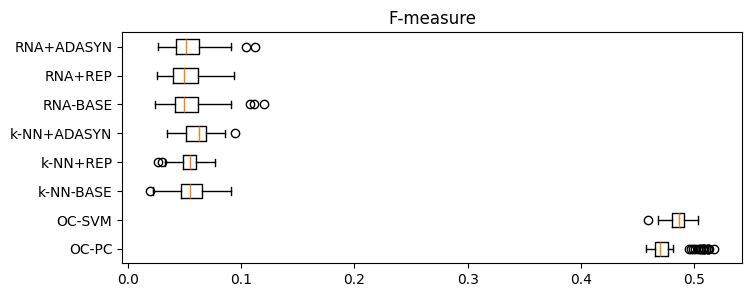

In [138]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 3))

axs.boxplot([Kseg_contr_neg.f2score, 
            SVM_contr_neg.f2score, 
            KNN_contr.f2score, 
            KNN_rep.f2score, 
            KNN_adasyn.f2score, 
            RNA_contr.f2score, 
            RNA_rep.f2score, 
            RNA_adasyn.f2score], vert=False)

axs.set_yticklabels(["OC-PC", "OC-SVM", "k-NN-BASE", "k-NN+REP", "k-NN+ADASYN", "RNA-BASE", "RNA+REP", "RNA+ADASYN"])
axs.set_title('F-measure')

plt.show()

### **G-mean**

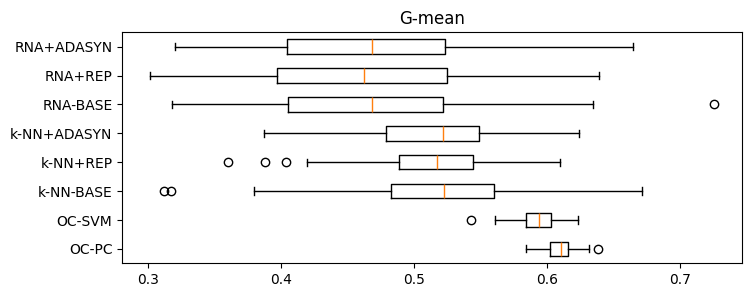

In [139]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 3))

axs.boxplot([Kseg_contr_neg.gmean, 
            SVM_contr_neg.gmean, 
            KNN_contr.gmean, 
            KNN_rep.gmean, 
            KNN_adasyn.gmean, 
            RNA_contr.gmean, 
            RNA_rep.gmean, 
            RNA_adasyn.gmean], vert=False)

axs.set_yticklabels(["OC-PC", "OC-SVM", "k-NN-BASE", "k-NN+REP", "k-NN+ADASYN", "RNA-BASE", "RNA+REP", "RNA+ADASYN"])
axs.set_title('G-mean')

plt.show()

### **IBA**

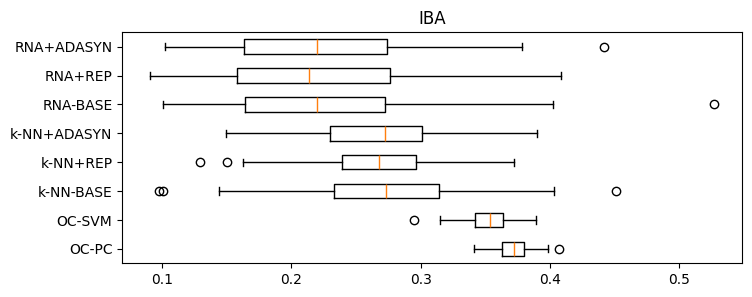

In [140]:
fig, axs = plt.subplots(nrows=1, figsize=(8, 3))

axs.boxplot([Kseg_contr_neg.gmean_mba, 
            SVM_contr_neg.gmean_mba, 
            KNN_contr.gmean_mba, 
            KNN_rep.gmean_mba, 
            KNN_adasyn.gmean_mba, 
            RNA_contr.gmean_mba, 
            RNA_rep.gmean_mba, 
            RNA_adasyn.gmean_mba], vert=False)

axs.set_yticklabels(["OC-PC", "OC-SVM", "k-NN-BASE", "k-NN+REP", "k-NN+ADASYN", "RNA-BASE", "RNA+REP", "RNA+ADASYN"])
axs.set_title('IBA')

plt.show()